In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import cv2
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
train_data=ImageDataGenerator(rescale=1/255).flow_from_directory('../input/100-bird-species/train',target_size=(224,224),class_mode='sparse',batch_size=256)

val_data=ImageDataGenerator(rescale=1/255).flow_from_directory('../input/100-bird-species/valid',target_size=(224,224),class_mode='sparse',batch_size=256)

test_data=ImageDataGenerator(rescale=1/255).flow_from_directory( '../input/100-bird-species/test',target_size=(224,224),class_mode='sparse',batch_size=256)

Found 58388 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.
Found 2000 images belonging to 400 classes.


In [3]:
train_data.class_indices

{'ABBOTTS BABBLER': 0,
 'ABBOTTS BOOBY': 1,
 'ABYSSINIAN GROUND HORNBILL': 2,
 'AFRICAN CROWNED CRANE': 3,
 'AFRICAN EMERALD CUCKOO': 4,
 'AFRICAN FIREFINCH': 5,
 'AFRICAN OYSTER CATCHER': 6,
 'ALBATROSS': 7,
 'ALBERTS TOWHEE': 8,
 'ALEXANDRINE PARAKEET': 9,
 'ALPINE CHOUGH': 10,
 'ALTAMIRA YELLOWTHROAT': 11,
 'AMERICAN AVOCET': 12,
 'AMERICAN BITTERN': 13,
 'AMERICAN COOT': 14,
 'AMERICAN GOLDFINCH': 15,
 'AMERICAN KESTREL': 16,
 'AMERICAN PIPIT': 17,
 'AMERICAN REDSTART': 18,
 'AMETHYST WOODSTAR': 19,
 'ANDEAN GOOSE': 20,
 'ANDEAN LAPWING': 21,
 'ANDEAN SISKIN': 22,
 'ANHINGA': 23,
 'ANIANIAU': 24,
 'ANNAS HUMMINGBIRD': 25,
 'ANTBIRD': 26,
 'ANTILLEAN EUPHONIA': 27,
 'APAPANE': 28,
 'APOSTLEBIRD': 29,
 'ARARIPE MANAKIN': 30,
 'ASHY THRUSHBIRD': 31,
 'ASIAN CRESTED IBIS': 32,
 'AVADAVAT': 33,
 'AZURE JAY': 34,
 'AZURE TANAGER': 35,
 'AZURE TIT': 36,
 'BAIKAL TEAL': 37,
 'BALD EAGLE': 38,
 'BALD IBIS': 39,
 'BALI STARLING': 40,
 'BALTIMORE ORIOLE': 41,
 'BANANAQUIT': 42,
 'BAND TAILED 

In [4]:
convlayer = VGG16(input_shape=(224,224,3),include_top=False)
for layer in convlayer.layers:
    layer.trainable=False

2022-03-25 23:37:09.999782: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-25 23:37:10.084693: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-25 23:37:10.085350: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-25 23:37:10.086439: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

58900480/58889256 [==============================] - 0s 0us/step


In [5]:
convlayer.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
model=Sequential()
model.add(convlayer)
model.add(Conv2D(filters=512, kernel_size=(7,7), padding="valid", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(1,1), padding="valid", activation="relu"))
model.add(Conv2D(filters=400, kernel_size=(1,1), padding="valid", activation="softmax"))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d (Conv2D)              (None, 1, 1, 512)         12845568  
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 512)         262656    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 400)         205200    
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
Total params: 28,028,112
Trainable params: 13,313,424
Non-trainable params: 14,714,688
_________________________________________________________________


In [7]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)

In [12]:
history=model.fit(train_data,validation_data=val_data,epochs=30,verbose = 1)

Epoch 1/30
229/229 [==============================] - 197s 858ms/step - loss: 0.0027 - accuracy: 0.9998 - val_loss: 1.5540 - val_accuracy: 0.7855
Epoch 2/30
229/229 [==============================] - 196s 856ms/step - loss: 0.0020 - accuracy: 0.9999 - val_loss: 1.5395 - val_accuracy: 0.7910
Epoch 3/30
229/229 [==============================] - 197s 860ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 1.5542 - val_accuracy: 0.7870
Epoch 4/30
229/229 [==============================] - 197s 859ms/step - loss: 0.0021 - accuracy: 0.9997 - val_loss: 1.6076 - val_accuracy: 0.7870
Epoch 5/30
229/229 [==============================] - 196s 856ms/step - loss: 0.0020 - accuracy: 0.9998 - val_loss: 1.5851 - val_accuracy: 0.7880
Epoch 6/30
229/229 [==============================] - 200s 874ms/step - loss: 0.0022 - accuracy: 0.9997 - val_loss: 1.6299 - val_accuracy: 0.7820
Epoch 7/30
229/229 [==============================] - 198s 865ms/step - loss: 0.0021 - accuracy: 0.9998 - val_loss: 1.6120 -

In [13]:
opt=tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='sparse_categorical_crossentropy',metrics=['accuracy'],optimizer=opt)
history_1=model.fit(train_data,validation_data=val_data,epochs=1)

229/229 [==============================] - 200s 869ms/step - loss: 0.0023 - accuracy: 0.9998 - val_loss: 1.8026 - val_accuracy: 0.7725


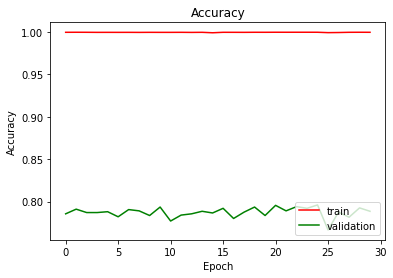

In [15]:
plt.plot(history.history['accuracy'],c='red')
plt.plot(history.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='lower right')

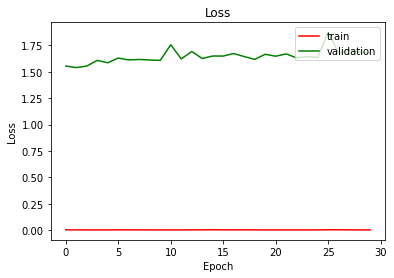

In [16]:
plt.plot(history.history['loss'],c='red')
plt.plot(history.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','validation'],loc='upper right')

In [17]:
model.evaluate(test_data)

8/8 [==============================] - 15s 2s/step - loss: 1.6638 - accuracy: 0.7945


[1.6638190746307373, 0.7944999933242798]